# Load

In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

OUTPUT_DIR = 'output/'

In [38]:
df = pd.read_csv(OUTPUT_DIR + 'df_all.csv')

print(df.shape)
display(df.head())

(240795, 33)


,stats_score,stats_kills,stats_deaths,stats_assists,stats_headshots,stats_bodyshots,stats_legshots,stats_damage_dealt,stats_damage_received,ability_casts_grenade,...,total_rounds,KDA Ratio,ADR,ACS,Overall Ability Cast,Win Ratio,damage_per_kills,queue_id_numeric,map_name_numeric,agent_name_numeric
0,-0.373784,-0.418093,0.856048,0.503302,-0.081188,-0.578460,-0.901913,-0.344157,1.354924,0.243616,...,0.79319,-0.551241,-0.719950,-0.731170,0.688671,-0.215257,0.112991,0,5,1
1,0.828314,0.752924,0.856048,0.800652,1.192798,-0.516386,0.068347,0.802564,0.643662,0.042060,...,0.79319,0.127553,0.442102,0.471817,-1.252211,0.274613,-0.176264,0,5,4
2,-0.067874,0.083771,1.104480,-0.091399,-0.991177,0.787160,2.655705,-0.221738,0.682217,1.553728,...,0.79319,-0.551241,-0.595894,-0.425034,1.076847,-0.215257,-0.757141,0,5,7
3,1.052361,0.920212,0.856048,-1.280799,0.646804,-0.454312,-0.255073,0.816910,0.960074,-0.461829,...,0.79319,-0.381543,0.456640,0.696029,-0.669947,-0.215257,-0.422546,0,5,2
4,0.139554,0.251059,0.110753,-0.686099,-0.081188,0.414718,1.038606,0.036489,-0.111472,-0.361052,...,0.79319,-0.251773,-0.334214,-0.217452,0.300494,0.274613,-0.582370,0,5,1


#Label Decoding

In [39]:
agent_dict = {
    'Omen': 0,
    'Sova': 1,
    'Jett': 2,
    'Chamber': 3,
    'Reyna': 4,
    'Killjoy': 5,
    'Astra': 6,
    'Cypher': 7,
    'Neon': 8,
    'Gekko': 9,
    'Clove': 10,
    'Vyse': 11,
    'Skye': 12,
    'Iso': 13,
    'Yoru': 14,
    'Raze': 15,
    'Phoenix': 16,
    'Deadlock': 17,
    'Harbor': 18,
    'KAY/O': 19,
    'Viper': 20,
    'Sage': 21,
    'Brimstone': 22,
    'Fade': 23,
    'Breach': 24
}
reversed_agent_dict = {v: k for k, v in agent_dict.items()}
df['agent_name'] = df['agent_name_numeric'].astype(int).map(reversed_agent_dict)

agent_roles = {
    0: "Controller",
    1: "Initiators",
    2: "Duelists",
    3: "Sentinels",
    4: "Duelists",
    5: "Sentinels",
    6: "Controller",
    7: "Sentinels",
    8: "Duelists",
    9: "Initiators",
    10: "Controller",
    11: "Sentinels",
    12: "Initiators",
    13: "Duelists",
    14: "Duelists",
    15: "Duelists",
    16: "Duelists",
    17: "Sentinels",
    18: "Controller",
    19: "Initiators",
    20: "Controller",
    21: "Sentinels",
    22: "Controller",
    23: "Initiators",
    24: "Initiators"
}
reversed_agent_roles = {v: k for k, v in agent_roles.items()}
df['agent_role'] = df['agent_name_numeric'].astype(int).map(agent_roles)

map_dict = {
    'Abyss': 0,
    'Split': 1,
    'Haven': 2,
    'Bind': 3,
    'Pearl': 4,
    'Ascent': 5,
    'Sunset': 6,
    'Fracture': 7,
    'Icebox': 8,
    'Lotus': 9,
    'Breeze': 10
}
reversed_map_dict = {v: k for k, v in map_dict.items()}
df['map_name'] = df['map_name_numeric'].astype(int).map(reversed_map_dict)

df.columns


Index(['stats_score', 'stats_kills', 'stats_deaths', 'stats_assists',
       'stats_headshots', 'stats_bodyshots', 'stats_legshots',
       'stats_damage_dealt', 'stats_damage_received', 'ability_casts_grenade',
       'ability_casts_ability1', 'ability_casts_ability2',
       'ability_casts_ultimate', 'tier_id', 'account_level',
       'economy_spent_overall', 'economy_spent_average',
       'economy_loadout_value_overall', 'economy_loadout_value_average',
       'total_plants', 'total_defuses', 'rounds_won', 'rounds_lost',
       'total_rounds', 'KDA Ratio', 'ADR', 'ACS', 'Overall Ability Cast',
       'Win Ratio', 'damage_per_kills', 'queue_id_numeric', 'map_name_numeric',
       'agent_name_numeric', 'agent_name', 'agent_role', 'map_name'],
      dtype='object')

#Filtering for just competitive

In [40]:
competitive_df = df[df['queue_id_numeric'] == 0]
competitive_df = competitive_df.reset_index(drop=True)

#Frequencies

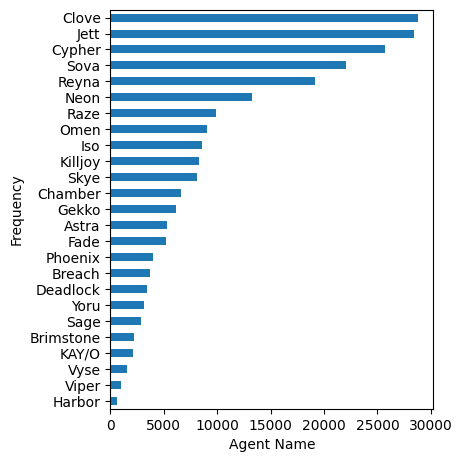

In [41]:
agent_counts = competitive_df['agent_name'].value_counts()
plt.figure(figsize=(12/2.54, 12/2.54))
agent_counts.plot(kind='barh')
# plt.title('Agent Name Frequencies')
plt.xlabel('Agent Name')
plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

*   Top 4 used agents are from different agent roles.
* Caution for data interpretations given the unbalanced use of agents.

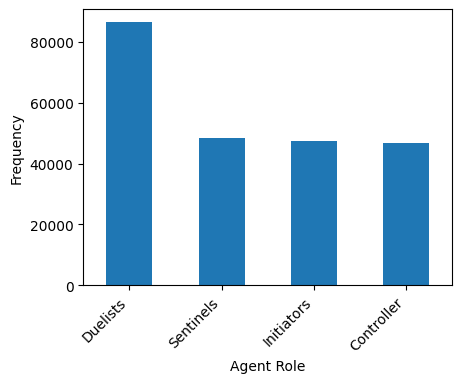

In [42]:
agent_counts = competitive_df['agent_role'].value_counts()
plt.figure(figsize=(12/2.54, 10/2.54))
agent_counts.plot(kind='bar')
# plt.title('Agent Role Frequencies')
plt.xlabel('Agent Role')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

More duelists found in the dataset compared to other roles. Could be from the fact that there are more duelist agents to begin with.

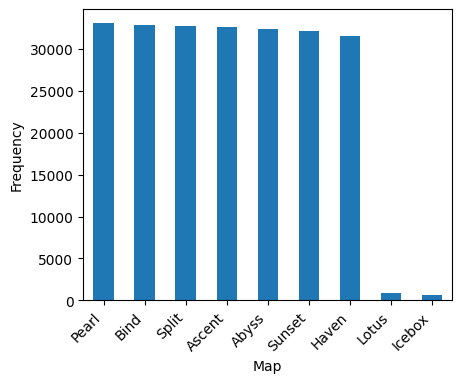

In [43]:
agent_counts = competitive_df['map_name'].value_counts()
plt.figure(figsize=(12/2.54, 10/2.54))
agent_counts.plot(kind='bar')
# plt.title('Map Frequencies')
plt.xlabel('Map')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

First seven maps having similar frequencies shows that the map randomization is fair. The last 2 is due to its omission in competitive games.

#Principal Component Analysis

In [44]:
# Get features to be included in the analysis
X = competitive_df.iloc[:,:-6]
X.columns

Index(['stats_score', 'stats_kills', 'stats_deaths', 'stats_assists',
       'stats_headshots', 'stats_bodyshots', 'stats_legshots',
       'stats_damage_dealt', 'stats_damage_received', 'ability_casts_grenade',
       'ability_casts_ability1', 'ability_casts_ability2',
       'ability_casts_ultimate', 'tier_id', 'account_level',
       'economy_spent_overall', 'economy_spent_average',
       'economy_loadout_value_overall', 'economy_loadout_value_average',
       'total_plants', 'total_defuses', 'rounds_won', 'rounds_lost',
       'total_rounds', 'KDA Ratio', 'ADR', 'ACS', 'Overall Ability Cast',
       'Win Ratio', 'damage_per_kills'],
      dtype='object')

In [45]:
X.shape

(229045, 30)

In [46]:
# Checking for highly correlated features

correlation_matrix = X.corr()

highly_correlated_pairs = set()
for feature1 in correlation_matrix.columns:
    for feature2 in correlation_matrix.index:
        if feature1 != feature2 and correlation_matrix.loc[feature1, feature2] >= 0.8:
            pair = tuple(sorted((feature1, feature2)))
            highly_correlated_pairs.add(pair)

for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

stats_damage_dealt and stats_headshots: 0.85
ACS and stats_score: 0.88
economy_loadout_value_overall and economy_spent_overall: 0.83
ADR and stats_damage_dealt: 0.87
ACS and ADR: 0.97
ADR and stats_score: 0.86
stats_headshots and stats_score: 0.84
ACS and stats_kills: 0.88
economy_spent_overall and stats_damage_received: 0.81
Win Ratio and rounds_won: 0.85
ADR and stats_kills: 0.85
stats_kills and stats_score: 0.98
stats_headshots and stats_kills: 0.84
economy_spent_overall and total_rounds: 0.88
economy_loadout_value_overall and total_rounds: 0.90
stats_damage_dealt and stats_score: 0.98
stats_damage_received and stats_deaths: 0.94
stats_damage_dealt and stats_kills: 0.95
ACS and stats_damage_dealt: 0.84


Highly correlated features are examined to see potential relationships that can be combined in the principal components.

In [47]:
# PCA proper
pca = PCA()

X_pca = pca.fit_transform(X)

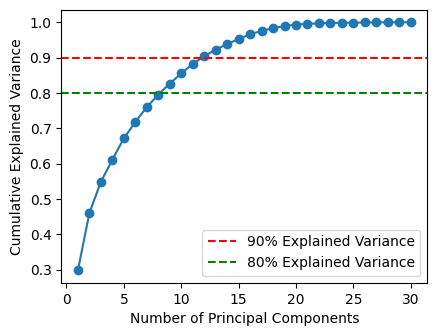

Number of components for 90% variance: 12
Number of components for 80% variance: 9


In [48]:
# Cumulative Variance Explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12/2.54, 9/2.54))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_components_90}")
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components for 80% variance: {n_components_80}")

The cumulative variance explained chart shows that 9-12 principal components are needed to explain 80%-90% of the variability in the data.

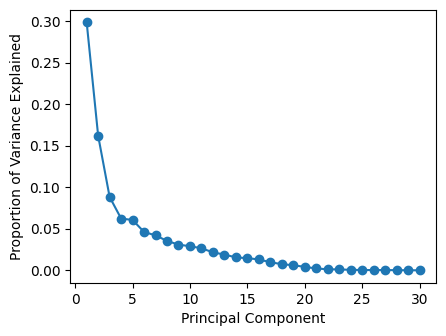

In [49]:
# Scree Plot
plt.figure(figsize=(12/2.54, 9/2.54))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
# plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

However, in the scree plot, 6 would be reasonable visually. It only explains 71.8% of the variability.

In [50]:
# Table of Eigenvalues and Variance Explained
scree_df = pd.DataFrame({
    'Principal Component': range(1, pca.n_components_ + 1),
    'Eigenvalue': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': pca.explained_variance_ratio_.cumsum()
})

print(scree_df.to_string(index=False))

 Principal Component  Eigenvalue  Explained Variance Ratio  Cumulative Explained Variance
                   1    8.958848                  0.298548                       0.298548
                   2    4.862365                  0.162035                       0.460583
                   3    2.649878                  0.088306                       0.548889
                   4    1.871308                  0.062360                       0.611249
                   5    1.817901                  0.060580                       0.671830
                   6    1.386209                  0.046195                       0.718024
                   7    1.262108                  0.042059                       0.760083
                   8    1.063554                  0.035442                       0.795525
                   9    0.928385                  0.030938                       0.826463
                  10    0.871283                  0.029035                       0.855498
          

Following the Kaiser Criterion, there should be 8 PCs with eigenvalues greater than 1. This gives 79.5% of explained variability. This strikes a balance between the cumulative variance and scree plot methods.

In [51]:
num_pc = 8
cumulative_variance_at_num_pc = cumulative_variance[num_pc - 1]
print(f"Cumulative variance at {num_pc} PCs: {cumulative_variance_at_num_pc*100:.4f}")

Cumulative variance at 8 PCs: 79.5525


In [52]:
pca_final = PCA(n_components=num_pc)
X_pca_final = pca_final.fit_transform(X)

pc_df = pd.DataFrame(data=X_pca_final, columns=[f'PC{i}' for i in range(1, num_pc+1)])

df2 = pd.concat([X, competitive_df.iloc[:, -6:], pc_df], axis=1)

In [53]:
df2.shape

(229045, 44)

In [54]:
df2.columns

Index(['stats_score', 'stats_kills', 'stats_deaths', 'stats_assists',
       'stats_headshots', 'stats_bodyshots', 'stats_legshots',
       'stats_damage_dealt', 'stats_damage_received', 'ability_casts_grenade',
       'ability_casts_ability1', 'ability_casts_ability2',
       'ability_casts_ultimate', 'tier_id', 'account_level',
       'economy_spent_overall', 'economy_spent_average',
       'economy_loadout_value_overall', 'economy_loadout_value_average',
       'total_plants', 'total_defuses', 'rounds_won', 'rounds_lost',
       'total_rounds', 'KDA Ratio', 'ADR', 'ACS', 'Overall Ability Cast',
       'Win Ratio', 'damage_per_kills', 'queue_id_numeric', 'map_name_numeric',
       'agent_name_numeric', 'agent_name', 'agent_role', 'map_name', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
      dtype='object')

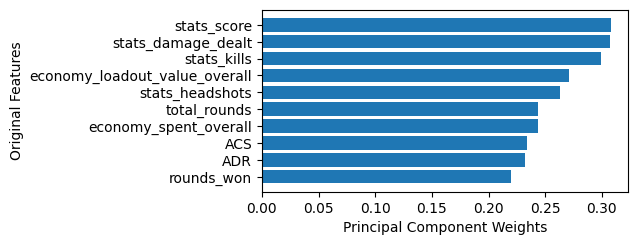

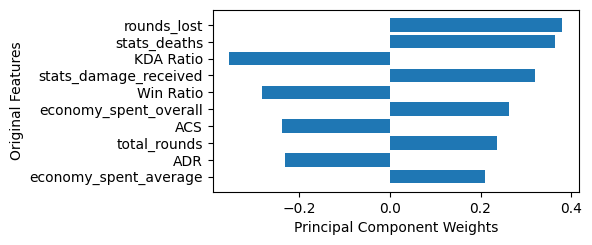

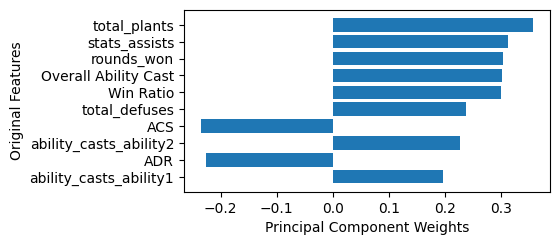

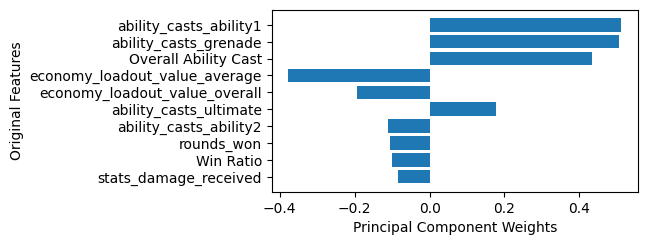

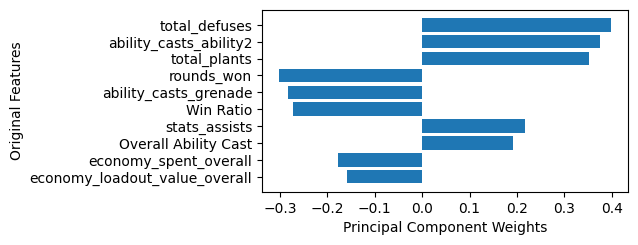

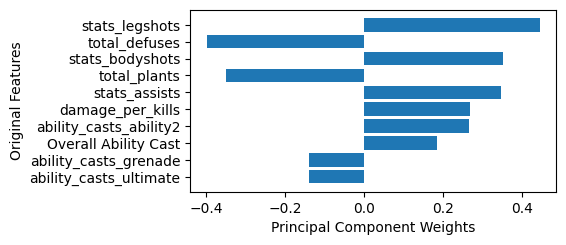

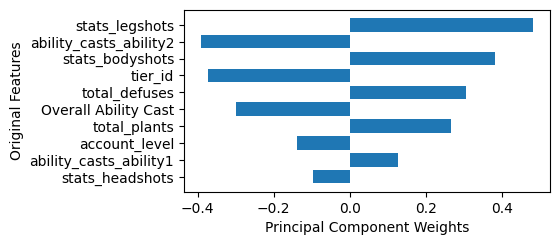

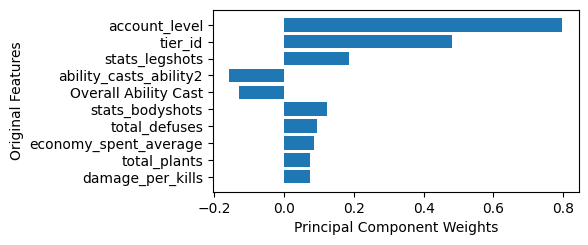

In [55]:
# Plots for top 10 features per PC
num_features = X.shape[1]
feature_names = X.columns

for i in range(1, num_pc+1):
    plt.figure(figsize=(12/2.54, 6/2.54))

    weights = pca_final.components_[i - 1]
    sorted_indices = np.argsort(np.abs(weights))[-10:]
    sorted_weights = weights[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    plt.barh(sorted_feature_names, sorted_weights)
    plt.xlabel('Principal Component Weights')
    plt.ylabel('Original Features')
    # plt.title(f'Top 10 Features for PC{i} (Sorted by Weights)')
    plt.show()

Some findings:
- PC1 seems to be more on the positive performace with high kills, damage dealt, economy usage, and rounds one. This could be an agressive play style that leads to victories. We will call this PC `Combat Prowess` to emphasize the skill and effectiveness in combat.
- PC2 deals more on rounds lost, deaths, and damage received, while being negatively impacted by the KDA and win ratios. This seems like a losing component attributed to getting damaged in-game. We will call this PC `Fragility Factor` for its susceptability to damage and negative outcomes.
- PC3 has the objective of planting the spike grouped with number of assists and ability usage which could indicate some supportive plays that lead to securing the planting of the spike. We will call it `Utility-Based Teamwork` to highlight role of utility in facilitating teamwork and achieving objectives.
- PC4 is characterized by high ability usage across various types, coupled with lower spending on weapons and a negative impact on win ratio. This suggests a playstyle that prioritizes abilities over traditional gunplay, potentially at the cost of consistent victories. We will call this PC `Ability Focus`.
- PC5 highlights players who prioritize both planting and defusing the Spike, utilizing abilities strategically to achieve these objectives. However, it also reflects a tendency towards unconventional strategies that may not always result in wins. This is because simply planting the Spike doesn't guarantee victory; the opposing team still has the opportunity to defuse.  We call this PC `Calculated Objective Play` to emphasize the strategic focus on both sides of objective play, acknowledging the complex relationship between these actions and winning.
- PC6 displays a pattern of strong gunplay with high leg and body shots, coupled with consistent assists and varied ability usage.  Plants and defuses have negative weights here. This suggests a playstyle focused on supporting the team through consistent damage and enabling kills, rather than directly securing objectives. We'll call this PC `Gunfire Support` to emphasize this supportive role through their firearm skills.
- PC7 demonstrates a playstyle where gun skills are directly used to facilitate objective-based actions. The positive weights for plants and defuses and strong indicators of gunplay like leg and body shots, suggest players who actively use their weapons to create opportunities to plant or defuse the Spike. We'll call this PC `Objective-Focused Gunplay` to capture this direct link between firearm skills and achieving in-game goals.
- PC8 is dominated by "account_level" and "tier_id," clearly indicating that this component captures elements related to player experience and rank within the game. This suggests that PC8 may represent a progression axis, where higher scores correlate with more experienced players who have reached higher ranks.  While some minor weights on gunplay and ability usage exist, they are secondary to the overwhelming emphasis on player level and tier. We'll call this PC `Player Progression` to reflect this central theme.

In [56]:
pc_names = {
    1: "Combat Prowess",
    2: "Fragility Factor",
    3: "Utility-Based Teamwork",
    4: "Ability Focus",
    5: "Calculated Objective Play",
    6: "Gunfire Support",
    7: "Objective-Focused Gunplay",
    8: "Player Progression"
}

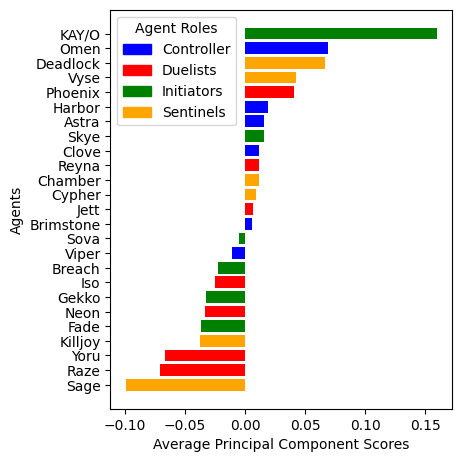

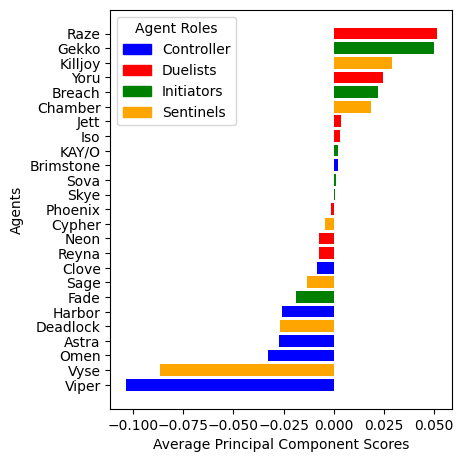

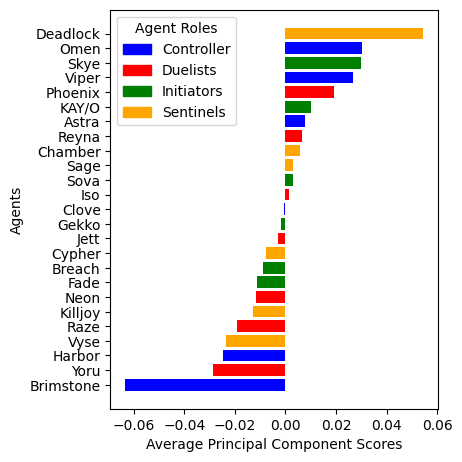

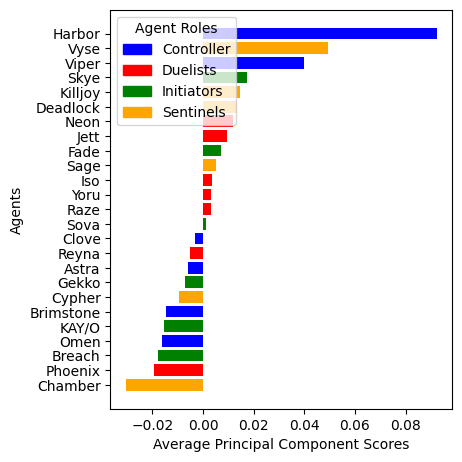

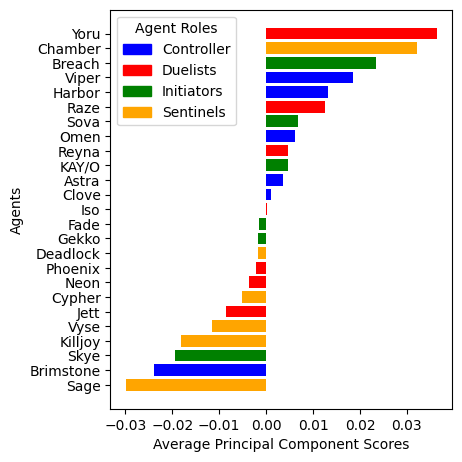

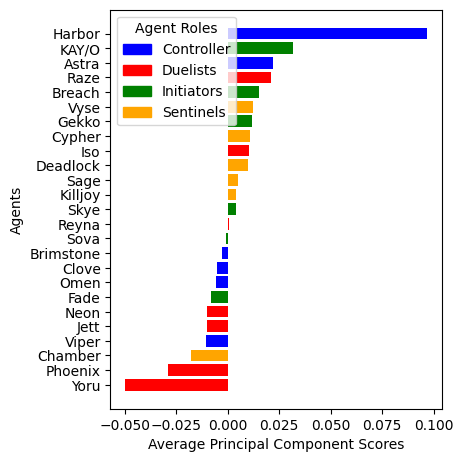

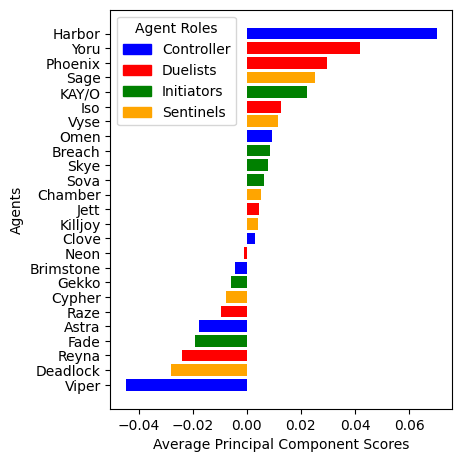

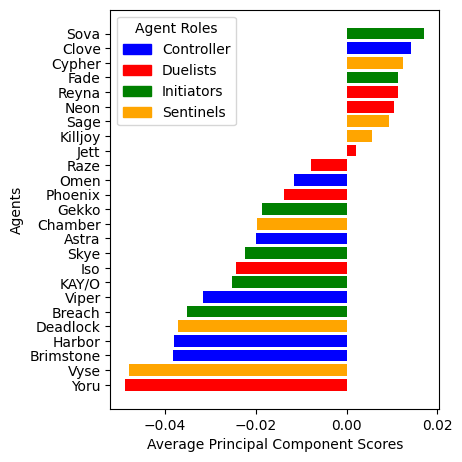

,PC: Combat Prowess,PC: Fragility Factor,PC: Utility-Based Teamwork,PC: Ability Focus,PC: Calculated Objective Play,PC: Gunfire Support,PC: Objective-Focused Gunplay,PC: Player Progression
agent_name,,,,,,,,
KAY/O,0.159659,0.001953,0.010049,-0.015565,0.004657,0.031807,0.022334,-0.025168
Omen,0.069289,-0.032721,0.030269,-0.016100,0.006058,-0.005682,0.009466,-0.011701
Deadlock,0.066348,-0.026803,0.054384,0.013228,-0.001773,0.009780,-0.027993,-0.037242
Vyse,0.042277,-0.086734,-0.023304,0.049185,-0.011451,0.012229,0.011685,-0.047930
Phoenix,0.041174,-0.001352,0.019143,-0.019481,-0.002087,-0.029134,0.029536,-0.013862
Harbor,0.019504,-0.025581,-0.024653,0.092369,0.013106,0.096712,0.070320,-0.038116
Astra,0.016000,-0.027364,0.007864,-0.005796,0.003500,0.022191,-0.017686,-0.019911
Skye,0.015657,0.000427,0.029788,0.017476,-0.019430,0.003860,0.007848,-0.022453
Clove,0.012062,-0.008373,-0.000501,-0.003125,0.000991,-0.005185,0.003130,0.014287


In [57]:
# Create the plots for PC scores by agent per PC ang get the tops and bottoms
all_pc_rankings = pd.DataFrame()

for i in range(1, num_pc+1):
    plt.figure(figsize=(12/2.54, 12/2.54))

    pc_scores = X_pca_final[:, i - 1]
    scores_df = pd.DataFrame({
        'agent_name': df2['agent_name'],
        'pc_scores': pc_scores,
        'agent_role': df2['agent_role']
    })

    avg_pc_scores = scores_df.groupby('agent_name')['pc_scores'].mean()
    avg_pc_scores = avg_pc_scores.sort_values(ascending=False)

    agent_roles_sorted = scores_df.groupby('agent_name')['agent_role'].first()[avg_pc_scores.index]

    role_colors = {'Controller': 'blue', 'Duelists': 'red', 'Initiators': 'green', 'Sentinels': 'orange'}

    legend_handles = []
    for role, color in role_colors.items():
        legend_handles.append(mpatches.Patch(color=color, label=role))

    plt.legend(handles=legend_handles, title='Agent Roles', loc='upper left')
    plt.barh(avg_pc_scores.index, avg_pc_scores.values, color=[role_colors[role] for role in agent_roles_sorted])
    plt.ylabel('Agents')
    plt.xlabel('Average Principal Component Scores')
    # plt.title(f'Average Principal Component Scores by Agents ({pc_names[i]})')
    # plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.savefig(OUTPUT_DIR + f'Agent-PC{i}.png')
    plt.show()

    all_pc_rankings[f'PC: {pc_names[i]}'] = avg_pc_scores


display(all_pc_rankings)

In [58]:
all_pc_rankings.to_csv(OUTPUT_DIR + 'all_pc_rankings.csv')

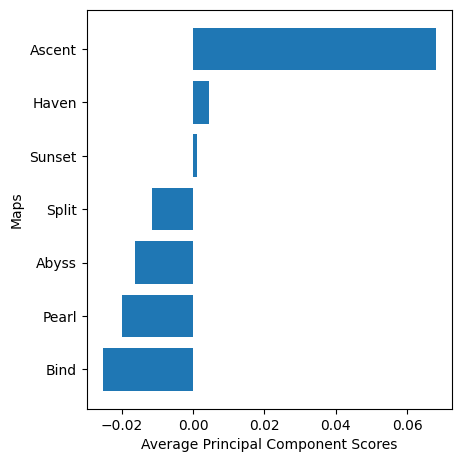

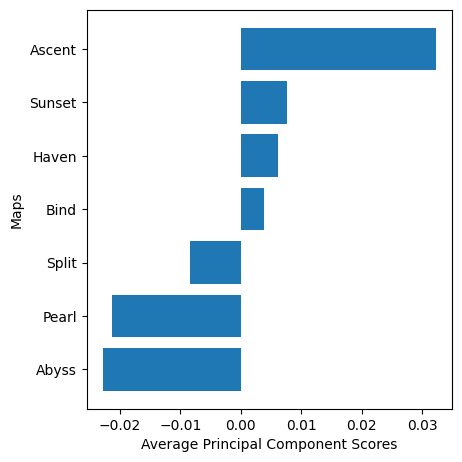

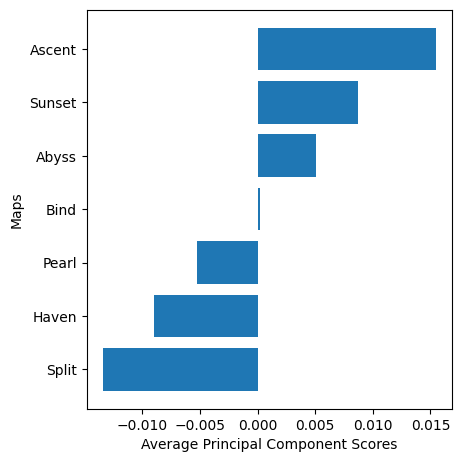

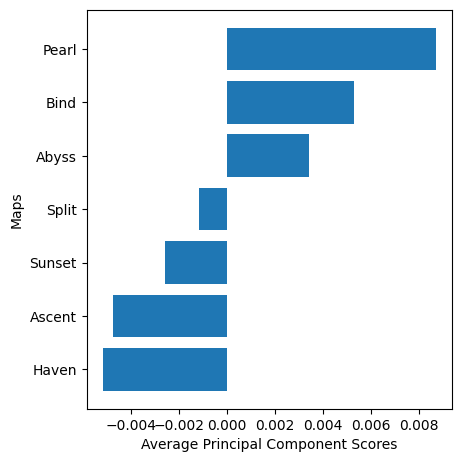

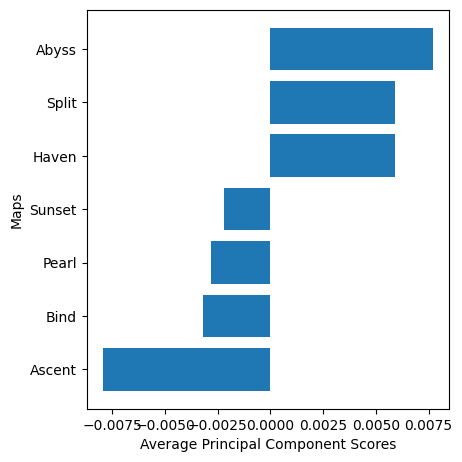

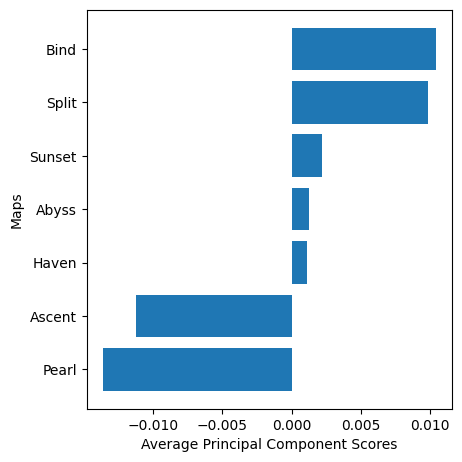

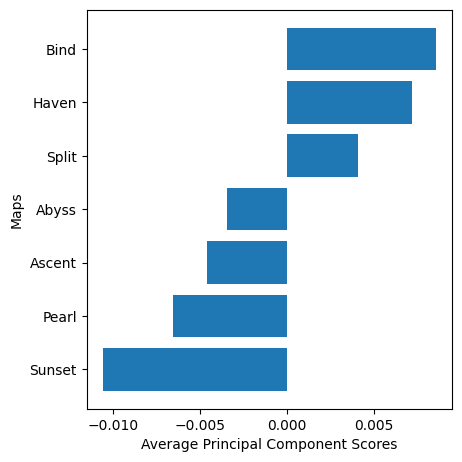

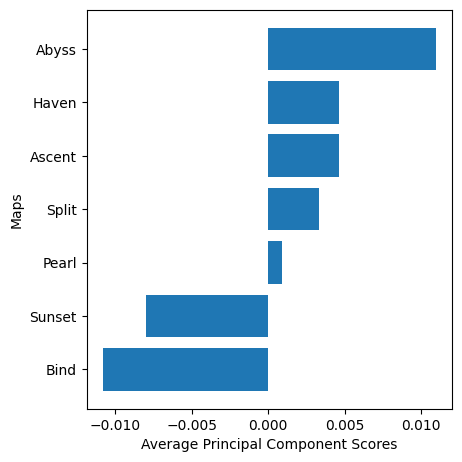

,Map,PC: Combat Prowess,PC: Fragility Factor,PC: Utility-Based Teamwork,PC: Ability Focus,PC: Calculated Objective Play,PC: Gunfire Support,PC: Objective-Focused Gunplay,PC: Player Progression
0,Abyss,-0.016370,-0.022753,0.005050,0.003402,0.007687,0.001224,-0.003439,0.010963
1,Ascent,0.068062,0.032219,0.015469,-0.004778,-0.007937,-0.011191,-0.004594,0.004640
2,Bind,-0.025166,0.003776,0.000225,0.005313,-0.003210,0.010394,0.008559,-0.010794
3,Haven,0.004336,0.006166,-0.009021,-0.005170,0.005902,0.001095,0.007200,0.004652
4,Pearl,-0.019886,-0.021279,-0.005259,0.008716,-0.002826,-0.013576,-0.006589,0.000909
5,Split,-0.011473,-0.008492,-0.013399,-0.001169,0.005920,0.009812,0.004053,0.003325
6,Sunset,0.001155,0.007679,0.008705,-0.002593,-0.002214,0.002186,-0.010587,-0.007995


In [59]:
# Create the plots for PC scores by map per PC
map_pc_rankings = pd.DataFrame()

for i in range(1, num_pc + 1):
    plt.figure(figsize=(12/2.54, 12/2.54))

    pc_scores = X_pca_final[:, i - 1]
    scores_df = pd.DataFrame({
        'map_name': df2['map_name'],
        'pc_scores': pc_scores
    })

    # Filter out unwanted maps
    filtered_scores_df = scores_df[~scores_df['map_name'].isin(['Lotus', 'Breeze', 'Icebox', 'Fracture'])]

    avg_pc_scores = filtered_scores_df.groupby('map_name')['pc_scores'].mean()
    avg_pc_scores = avg_pc_scores.sort_values(ascending=False)

    plt.barh(avg_pc_scores.index, avg_pc_scores.values)
    plt.ylabel('Maps')
    plt.xlabel('Average Principal Component Scores')
    # plt.title(f'Average Principal Component Scores by Maps ({pc_names[i]})')
    # plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.savefig(OUTPUT_DIR + f'Map-PC{i}.png')
    plt.show()

    pc_map_rankings = avg_pc_scores.reset_index().rename(columns={'map_name': 'Map', 'pc_scores': f'PC: {pc_names[i]}'})

    if map_pc_rankings.empty:
        map_pc_rankings = pc_map_rankings
    else:
        map_pc_rankings = pd.merge(map_pc_rankings, pc_map_rankings, on='Map', how='outer')

display(map_pc_rankings)

In [60]:
map_pc_rankings.to_csv(OUTPUT_DIR + 'map_pc_rankings.csv')

#Baseline Recommendations

The recommendations are based solely on the sum of the average scores of agents across all 8 PCs per map.

In [61]:
pc_names = pc_df.columns.tolist()

In [62]:
map_names = df2['map_name'].unique().tolist()

In [63]:
'''This is to invert signs of PC2
because we want a original meaning of PC2 is: high PC2 score = more fragile.
If we want a good agent, we want a less fragile less losing agent.
Inverting the signs should do the trick.
'''

df2['PC2']=-df2['PC2']

In [64]:
def top_agents_overall(df, pc_names, num_agents=5, show_scores=True):
    """Creates a table of recommended agents with separate agent and score columns, regardless of the map."""
    agent_pc_scores = df.groupby('agent_name')[pc_names].mean()
    agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)
    recommended_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).index.tolist()
    top_agents = recommended_agents[:num_agents]
    recommendations_df = pd.DataFrame({
        'Agent': top_agents,
        'Score': [agent_pc_scores.loc[agent, 'total_pc_score'] for agent in top_agents]
    })
    if not show_scores:
        recommendations_df = recommendations_df.drop(columns=['Score'])
    return recommendations_df

In [65]:
top_agents_overall(df2, pc_names, num_agents=5, show_scores=False)

,Agent
0,Harbor
1,KAY/O
2,Vyse
3,Omen
4,Deadlock


In [66]:
import pandas as pd

def top_agents_per_map(df, pc_names, maps, num_agents=5, show_scores=True):
    """Creates a table of recommended agents per map with separate agent and score columns."""
    all_recommendations = {}
    for map_name in maps:
        map_data = df[df['map_name'] == map_name]
        agent_pc_scores = map_data.groupby('agent_name')[pc_names].mean()
        agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)
        recommended_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).index.tolist()
        top_agents = recommended_agents[:num_agents]

        all_recommendations[map_name] = {agent: agent_pc_scores.loc[agent, 'total_pc_score'] for agent in top_agents}

    columns = []
    for map_name in maps:
        columns.extend([(map_name, 'Agent'), (map_name, 'Score')])

    recommendations_df = pd.DataFrame(index=range(5), columns=pd.MultiIndex.from_tuples(columns))

    for map_name in maps:
        for i, (agent, score) in enumerate(all_recommendations[map_name].items()):
            recommendations_df.loc[i, (map_name, 'Agent')] = agent
            recommendations_df.loc[i, (map_name, 'Score')] = score

    if not show_scores:
        recommendations_df = recommendations_df.drop(columns=['Score'], level=1)

    return recommendations_df

In [67]:
top_agents_per_map(df2, pc_names, map_names, num_agents=5, show_scores=False)

,Ascent,Abyss,Sunset,Haven,Split,Pearl,Bind,Icebox,Lotus
,Agent,Agent,Agent,Agent,Agent,Agent,Agent,Agent,Agent
0,Viper,KAY/O,KAY/O,Harbor,Harbor,Skye,KAY/O,Vyse,Sage
1,Gekko,Harbor,Killjoy,Brimstone,Phoenix,Harbor,Viper,Omen,Omen
2,Vyse,Vyse,Skye,Clove,Viper,Raze,Deadlock,Gekko,Phoenix
3,KAY/O,Brimstone,Vyse,Skye,Deadlock,Chamber,Sova,Fade,Skye
4,Omen,Reyna,Deadlock,Cypher,Vyse,Phoenix,Astra,Raze,Viper


In [68]:
def top_agents_per_role(df, pc_names, num_agents=1, show_scores=True):
    """Creates a table of recommended agents per role with specified number of agents per role,
    without considering maps, breaking agents into rows per role if num_agents > 1."""
    all_recommendations = []

    for role in df['agent_role'].unique():
        role_data = df[df['agent_role'] == role]
        agent_pc_scores = role_data.groupby('agent_name')[pc_names].mean()
        agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)

        top_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents).index.tolist()
        top_scores = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents)['total_pc_score'].tolist()

        for i in range(num_agents):
            if i < len(top_agents):
                all_recommendations.append({
                    'Role': role,
                    'Agent': top_agents[i],
                    'Score': top_scores[i]
                })

    recommendations_df = pd.DataFrame(all_recommendations)
    if not show_scores:
        recommendations_df = recommendations_df.drop(columns=['Score'])
    return recommendations_df

In [69]:
top_agents_per_role(df2, pc_names, 1, False)

,Role,Agent
0,Initiators,KAY/O
1,Duelists,Phoenix
2,Sentinels,Vyse
3,Controller,Harbor


In [70]:
def top_agents_by_role_map(df, maps, pc_names, num_agents=1, show_scores=True):
    """Recommends agents per map per role based on PC scores,
    includes an overall best agent different from role recommendations,
    and allows showing/hiding scores."""
    all_recommendations = {}
    for map_name in maps:
        all_recommendations[map_name] = {}
        map_data = df[df['map_name'] == map_name]

        # Recommendations by role
        for role in map_data['agent_role'].unique():
            role_data = map_data[map_data['agent_role'] == role]
            agent_pc_scores = role_data.groupby('agent_name')[pc_names].mean()
            agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)
            recommended_agents = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents).index.tolist()
            scores = agent_pc_scores.sort_values('total_pc_score', ascending=False).head(num_agents)['total_pc_score'].tolist()
            all_recommendations[map_name][role] = {'agent': recommended_agents, 'score': scores}

        # Overall best agent for the map (different from role recommendations)
        role_recommendations = [agent for role_data in all_recommendations[map_name].values() for agent in role_data['agent']]

        agent_pc_scores = map_data.groupby('agent_name')[pc_names].mean()
        agent_pc_scores['total_pc_score'] = agent_pc_scores.sum(axis=1)

        # Filter out already recommended agents, handling empty role_recommendations
        if role_recommendations:  # Check if role_recommendations is not empty
            filtered_agent_scores = agent_pc_scores[~agent_pc_scores.index.isin(role_recommendations)]
        else:
            filtered_agent_scores = agent_pc_scores  # Use all agents if no role recommendations

        overall_best_agent = filtered_agent_scores.sort_values('total_pc_score', ascending=False).head(1).index.tolist()[0] if not filtered_agent_scores.empty else None  # Handle empty filtered_agent_scores
        overall_best_score = filtered_agent_scores.sort_values('total_pc_score', ascending=False).head(1)['total_pc_score'].tolist()[0] if not filtered_agent_scores.empty else None  # Handle empty filtered_agent_scores

        all_recommendations[map_name]['Fifth'] = {'agent': [overall_best_agent], 'score': [overall_best_score]}

    # Create the DataFrame
    roles = ['Controller', 'Duelists', 'Initiators', 'Sentinels', 'Fifth']
    columns = pd.MultiIndex.from_product([maps, ['Agent', 'Score']], names=['Map', ''])
    recommendations_df = pd.DataFrame(index=roles, columns=columns)

    for map_name in maps:
        for role in roles:
            if role in all_recommendations[map_name]:
                recommendations_df.loc[role, (map_name, 'Agent')] = all_recommendations[map_name][role]['agent'][0]
                if show_scores:  # Add scores if show_scores is True
                    recommendations_df.loc[role, (map_name, 'Score')] = all_recommendations[map_name][role]['score'][0]
            else:
                recommendations_df.loc[role, (map_name, 'Agent')] = None
                if show_scores:  # Add scores if show_scores is True
                    recommendations_df.loc[role, (map_name, 'Score')] = None

    # Drop the 'Score' columns if show_scores is False
    if not show_scores:
        recommendations_df = recommendations_df.drop(columns=['Score'], level=1)

    return recommendations_df

In [71]:
top_agents_by_role_map(df2, map_names, pc_names, show_scores=False)

Map,Ascent,Abyss,Sunset,Haven,Split,Pearl,Bind,Icebox,Lotus
,Agent,Agent,Agent,Agent,Agent,Agent,Agent,Agent,Agent
Controller,Viper,Harbor,Clove,Harbor,Harbor,Harbor,Viper,Omen,Omen
Duelists,Neon,Reyna,Iso,Jett,Phoenix,Raze,Yoru,Raze,Phoenix
Initiators,Gekko,KAY/O,KAY/O,Skye,Fade,Skye,KAY/O,Gekko,Skye
Sentinels,Vyse,Vyse,Killjoy,Cypher,Deadlock,Chamber,Deadlock,Vyse,Sage
Fifth,KAY/O,Brimstone,Skye,Brimstone,Viper,Phoenix,Sova,Fade,Viper


In [72]:
recommend_agents_by_role_map(df2, map_names, pc_names, show_scores=False).to_excel('recommended_agents.xlsx')

NameError: name 'recommend_agents_by_role_map' is not defined

In [ ]:
def recommend_teammates_table(df, agent_name, pc_names, maps, num_lowest=4):
    """Recommends 4 teammates for a given agent, one from each role, plus a flex pick."""
    all_recommendations = {}

    for map_name in maps:
        map_data = df[df['map_name'] == map_name]
        agent_data = map_data[map_data['agent_name'] == agent_name]

        if agent_data.empty:
            all_recommendations[map_name] = [None] * 4  # Fill with None if agent not on map
            continue

        all_roles = list(df['agent_role'].unique())  # All roles

        mean_pc_scores = agent_data[pc_names].mean()
        lowest_pcs = mean_pc_scores.nsmallest(num_lowest).index

        recommendations = []
        for role in all_roles:  # Get one teammate from each role
            role_agents = map_data[(map_data['agent_name'] != agent_name) & (map_data['agent_role'] == role)]
            agent_scores = role_agents.groupby('agent_name')[lowest_pcs].mean()
            agent_scores['total_score'] = agent_scores.sum(axis=1)
            if not agent_scores.empty:
                recommendations.append(agent_scores.sort_values('total_score', ascending=False).index[0])
            else:
                recommendations.append(None)  # If no agent for role on map
            if len(recommendations) == 4:
                break

        # Flex pick: overall best, excluding already recommended and agent
        all_agents = map_data[(map_data['agent_name'] != agent_name) & (~map_data['agent_name'].isin(recommendations))]
        agent_scores = all_agents.groupby('agent_name')[pc_names].mean()
        agent_scores['total_score'] = agent_scores.sum(axis=1)
        if not agent_scores.empty:
            recommendations.append(agent_scores.sort_values('total_score', ascending=False).index[0])
        else:
            recommendations.append(None)

        all_recommendations[map_name] = recommendations

    recommendations_df = pd.DataFrame.from_dict(all_recommendations, orient='index')
    recommendations_df.columns = all_roles + ['Flex']  # Set columns to all roles + flex
    recommendations_df.index.name = 'Map'

    # Reorder columns to ensure correct order
    recommendations_df = recommendations_df[['Duelists', 'Initiators', 'Sentinels', 'Controller', 'Flex']]

    return recommendations_df

In [ ]:
most_used_agents = df2['agent_name'].value_counts().head(4).index.tolist()
print(most_used_agents)

['Jett', 'Clove', 'Cypher', 'Sova']


In [ ]:
for agent in most_used_agents:
    print(f'Recommended Teammates for {agent}')
    display(recommend_teammates_table(df2, agent, pc_names, map_names))
    print('\n')

Recommended Teammates for Jett


,Duelists,Initiators,Sentinels,Controller,Flex
Map,,,,,
Ascent,Yoru,Gekko,Vyse,Viper,Chamber
Sunset,Iso,KAY/O,Vyse,Harbor,Brimstone
Haven,Iso,Breach,Sage,Viper,Deadlock
Bind,Iso,KAY/O,Killjoy,Viper,Yoru
Pearl,Iso,Gekko,Deadlock,Viper,Killjoy
Split,Phoenix,Fade,Killjoy,Harbor,Brimstone
Abyss,Phoenix,Skye,Chamber,Harbor,Viper
Lotus,Iso,Breach,Deadlock,Omen,Sage
Icebox,Phoenix,KAY/O,Vyse,Harbor,Sage




Recommended Teammates for Clove


,Duelists,Initiators,Sentinels,Controller,Flex
Map,,,,,
Ascent,Raze,Gekko,Cypher,Viper,Vyse
Sunset,Iso,Gekko,Killjoy,Brimstone,Harbor
Haven,Reyna,Breach,Deadlock,Omen,Vyse
Bind,Iso,KAY/O,Vyse,Viper,Yoru
Pearl,Phoenix,Skye,Deadlock,Astra,Iso
Split,Phoenix,KAY/O,Killjoy,Harbor,Brimstone
Abyss,Phoenix,Skye,Chamber,Harbor,Viper
Lotus,Yoru,Breach,Deadlock,Omen,Sage
Icebox,Raze,KAY/O,Vyse,Harbor,Sage




Recommended Teammates for Cypher


,Duelists,Initiators,Sentinels,Controller,Flex
Map,,,,,
Ascent,Yoru,Fade,Vyse,Viper,Gekko
Sunset,Iso,KAY/O,Vyse,Harbor,Brimstone
Haven,Phoenix,Skye,Vyse,Astra,Deadlock
Bind,Neon,Breach,Deadlock,Viper,KAY/O
Pearl,Iso,Breach,Killjoy,Clove,Deadlock
Split,Yoru,Gekko,Killjoy,Brimstone,Harbor
Abyss,Phoenix,Skye,Chamber,Brimstone,Viper
Lotus,Neon,Skye,Sage,Brimstone,Deadlock
Icebox,Phoenix,Breach,Vyse,Harbor,Sage




Recommended Teammates for Sova


,Duelists,Initiators,Sentinels,Controller,Flex
Map,,,,,
Ascent,Yoru,Fade,Vyse,Viper,Gekko
Sunset,Iso,KAY/O,Vyse,Harbor,Brimstone
Haven,Phoenix,Skye,Sage,Astra,Deadlock
Bind,Yoru,KAY/O,Sage,Harbor,Breach
Pearl,Iso,Fade,Killjoy,Astra,Deadlock
Split,Reyna,Fade,Killjoy,Harbor,Brimstone
Abyss,Yoru,KAY/O,Chamber,Viper,Harbor
Lotus,Jett,Breach,Deadlock,Omen,Sage
Icebox,Raze,Breach,Vyse,Harbor,Sage


In [ ]:
recommend_teammates_table(df2, 'Jett', pc_names, map_names).to_excel('Jett Recos.xlsx')

In [ ]:
recommend_teammates_table(df2, 'Clove', pc_names, map_names).to_excel('Clove Recos.xlsx')

In [ ]:
recommend_teammates_table(df2, 'Sova', pc_names, map_names).to_excel('Sova Recos.xlsx')

In [ ]:
recommend_teammates_table(df2, 'Cypher', pc_names, map_names).to_excel('Cypher Recos.xlsx')